<img src="http://www.organicdatacuration.org/linkedearth/images/5/51/EarthLinked_Banner_blue_NoShadow.jpg">


# Welcome to Pyleoclim!

Pyleoclim is a python package for the analysis of paleoclimate data. It uses the <a href="http://www.clim-past.net/12/1093/2016/cp-12-1093-2016-discussion.html">LiPD</a> format.

Information about how LiPD, including a Notebook highlighting the main functionalities can be found <a href="https://github.com/nickmckay/LiPD-utilities">here</a>.

If you're new to Python and Jupyter Notebook, a quick tutorial is available <a href="https://github.com/nickmckay/LiPD-utilities/tree/master/Examples">here</a>

## Table of contents
* [Importing Pyleoclim and Manipulating LiPD files](#import)
* [Mapping](#maps)
    * [mapAllArchive](#allarchive)
    * [mapLipd](#maplipd)
    * [mapNearRecords](#mapnear)
* [Plotting](#plots)
    * [plotTs](#plotTs)
    * [plotEnsTs](#plotens)
    * [histTs](#histTs)
    * [Summary plots](#sumplots)
        * [basicSummary](#basicsum)        
* [Statistics](#basic)
    * [statsTs](#stats)
    * [corrSigTs](#corrsig)
* [Timeseries Manipulation](#timeseries)
    * [binTs](#bin)
    * [interpTs](#interp)
    * [standardizeTs](#std)
    * [segmentTs](#segment)
* [Analyses in the Frequency Domain](#spectral)
    * [wwzTs](#wwz)
* [Age Modelling](#agemodel)
    * [Bchron](#bchron)

To start, import the pyleoclim module. Example LiPD files can be downloaded <a href ="https://github.com/LinkedEarth/Pyleoclim_util/tree/master/Example">here</a>.

## <a name='import'> Importing Pyleoclim and Manipulating LiPD files </a>

In [1]:
import pyleoclim as pyleo

All the Pyleoclim modules are loaded and ready to go. The sections below describe the available functions.

The pyleoclim package is meant work in tandem with the <a href='https://github.com/nickmckay/LiPD-utilities/tree/master/Python'>LiPD utilities</a>. However it is possible to use the various packages independently. For instance, calling pyleoclim.Stats will call the stats package and allows you to use the main functions without the need of a timeseries object, a centerpiece of the LiPD package.

<div class="alert alert-warning" role="alert" style="margin: 10px">
<p>**NOTE**</p>
<p> When using the packages individually, be careful about handling missing values</p>
</div>  

The following functions allow to load LiPD files into the workspace and extract the timeseries object.

If you forget this step, you'll be prompted when first using any of the pyleoclim methods.

<div class="alert alert-warning" role="alert" style="margin: 10px">
<p>**NOTE**</p>
<p> If the list of timeseries is specified, the path ***needs*** to be specified as well</p>
</div>  

In [2]:
lipds = pyleo.openLipd("../example_data/")

Disclaimer: LiPD files may be updated and modified to adhere to standards

Found: 14 LiPD file(s)
reading: Arc-Yukon.D'Arrigo.2006.lpd
reading: MD97-2121.Marr.2013.lpd
reading: Eur-NorthernSpain.Martín-Chivelet.2011.lpd
reading: Arc-LakeNataujärvi.Ojala.2005.lpd
1.46 MB :That's a big file! This may take a while to load...
reading: MD982176.Stott.2004.lpd
7.61 MB :That's a big file! This may take a while to load...
reading: Juxtlahuaca.Lachniet.2012.lpd
reading: Ocn-MadangLagoonPapuaNewGuinea.Kuhnert.2001.lpd
reading: Asi-Dasuopu.Thompson.2000.lpd
reading: Asi-TH001.Buckley.2010.lpd
reading: Ocn-SantaBarbaraBasin.Zhao.2000.lpd
reading: Ant-JamesRossIsland.Mulvaney.2013.lpd
reading: MD98-2170.Stott.2004.lpd
reading: MD01-2378.Xu.2008.lpd
reading: Ocn-TongueoftheOcean.Rosenheim.2005.lpd
Finished read: 14 records


In [3]:
ts_list = pyleo.fetchTs(lipds)

extracting paleoData...
extracting: Arc-Yukon.D'Arrigo.2006
extracting: MD97-2121.Marr.2013
extract: Exception: can only concatenate list (not "str") to list
extracting: Eur-NorthernSpain.Martín-Chivelet.2011
extracting: Arc-LakeNataujärvi.Ojala.2005
extracting: MD982176.Stott.2004
extracting: Juxtlahuaca.Lachniet.2012
extracting: Ocn-MadangLagoonPapuaNewGuinea.Kuhnert.2001
extracting: Asi-Dasuopu.Thompson.2000
extracting: Asi-TH001.Buckley.2010
extracting: Ocn-SantaBarbaraBasin.Zhao.2000
extracting: Ant-JamesRossIsland.Mulvaney.2013
extracting: MD98-2170.Stott.2004
extracting: MD01-2378.Xu.2008
extracting: Ocn-TongueoftheOcean.Rosenheim.2005
Created time series: 50 entries


## <a id="mapping"> Mapping </a>

### <a name='allarchive'> mapAllArchive() </a>

This function maps all the LiPD records in the working directory according to archiveType. It uses a default palette color accessible by typing `pyleo.plot_default`

Synthax: `fig = pyleoclim.mapAll(lipds = None, markersize = 50, projection = 'Robinson', proj_default = True, background = True, borders = False, rivers = False, lakes = False, figsize = [10,4], saveFig = False, dir = None, format = "eps")`

Arguments:
* `lipds` (dict): A list of LiPD files. (Optional)
* `markersize` (int): The size of the markers. Default is 50
* `projection` (string): the map projection. Available projections:
            'Robinson', 'PlateCarree', 'AlbertsEqualArea',
            'AzimuthalEquidistant','EquidistantConic','LambertConformal',
            'LambertCylindrical','Mercator','Miller','Mollweide','Orthographic' (Default),
            'Sinusoidal','Stereographic','TransverseMercator','UTM',
            'InterruptedGoodeHomolosine','RotatedPole','OSGB','EuroPP',
            'Geostationary','NearsidePerspective','EckertI','EckertII',
            'EckertIII','EckertIV','EckertV','EckertVI','EqualEarth','Gnomonic',
            'LambertAzimuthalEqualArea','NorthPolarStereo','OSNI','SouthPolarStereo'
* `proj_default` (bool): If True, uses the standard projection attributes, including centering. Enter new attributes in a dictionary to change them. Lists of attributes can be found in the Cartopy documentation: 
https://scitools.org.uk/cartopy/docs/latest/crs/projections.html#eckertiv
* `background` (bool): If True, uses a shaded relief background (only one available in Cartopy)
* `borders` (bool): Draws the countries border. Defaults is off (False). 
* `rivers` (bool): Draws major rivers. Default is off (False).
* `lakes` (bool): Draws major lakes. Default is off (False).
* `figsize` (list): the size for the figure
* `saveFig` (bool): Default is to not save the figure
* `dir` (str): The absolute path of the directory in which to save the figure. If not provided, creates a default folder called 'figures'in the LiPD working directory (lipd.path).
* `format` (str): One of the file extensions supported by the active backend. Default is "eps". Most backend support png, pdf, ps, eps, and svg.

Returns: The figure

<div class="alert alert-warning" role="alert" style="margin: 10px">
<p>**NOTE**</p>
<p> This function takes optional arguments. If they are specified byt the user, then Python will use the specified values, otherwise the function will run with the default value. Unlike required arguments, optional arguments always include an equal sign with the specified values.</p>
<p> To run the function with the default arguments, simply use `FunctionName()`</p>
<p> If you wish to only change one argument from its default value, just enter the argument name followed by its new value.</p>
</div>   

<div class="alert alert-warning" role="alert" style="margin: 10px">
<p>**NOTE**</p>
<p> To visualize matplotlib plot inside the Notebook, we need to use the `%matplotib notebook` or `%matplotib inline` Magic command. Jupyter has an extensive list of special functions called Magic commands. These commands are built-in and can be run from anywhere. They are generally identified by their preceding % sign. </p> 
</div> 

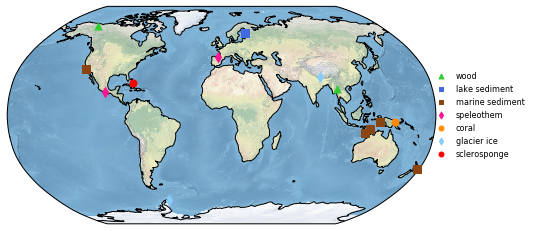

In [4]:
%matplotlib inline
fig = pyleo.mapAllArchive()

Let's change the marksize to 100.

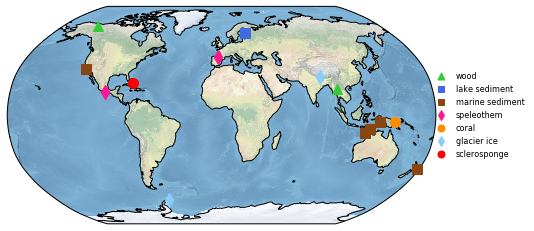

In [5]:
%matplotlib inline
fig = pyleo.mapAllArchive(markersize = 100)

### <a name='maplipd'>mapLipd()</a>

This function maps one particular LiPD record stored in the working directory.

Synthax: `fig = pyleoclim.mapLipd(timeseries=None, projection = 'Orthographic', proj_default = True,        background = True, label = 'default', borders = False, rivers = False, lakes = False, markersize = 50, marker = "default",figsize = [4,4], saveFig = False, dir = None, format="eps")`

Arguements: 

* `timeseries`: a LiPD timeseries object. Will prompt for one if not given
* `projection` (string): the map projection. Available projections:
            'Robinson', 'PlateCarree', 'AlbertsEqualArea',
            'AzimuthalEquidistant','EquidistantConic','LambertConformal',
            'LambertCylindrical','Mercator','Miller','Mollweide','Orthographic' (Default),
            'Sinusoidal','Stereographic','TransverseMercator','UTM',
            'InterruptedGoodeHomolosine','RotatedPole','OSGB','EuroPP',
            'Geostationary','NearsidePerspective','EckertI','EckertII',
            'EckertIII','EckertIV','EckertV','EckertVI','EqualEarth','Gnomonic',
            'LambertAzimuthalEqualArea','NorthPolarStereo','OSNI','SouthPolarStereo'
* `proj_default` (bool): If True, uses the standard projection attributes, including centering. Enter new attributes in a dictionary to change them. Lists of attributes can be found in the Cartopy documentation: https://scitools.org.uk/cartopy/docs/latest/crs/projections.html#eckertiv
* `background` (bool): If True, uses a shaded relief background (only one available in Cartopy)
* `label` (str): label for archive marker. Default is to use the name of the  physical sample. If no archive name is available, default to None. None returns no label. 
* `borders` (bool): Draws the countries border. Defaults is off (False). 
* `rivers` (bool): Draws major rivers. Default is off (False).
* `lakes` (bool): Draws major lakes. Default is off (False).
* `markersize` (int): The size of the marker.
* `marker` (str or list): color and type of marker. Default will use the default color palette for archives
* `figsize` (list): the size for the figure
* `saveFig` (bool): default is to not save the figure
* `dir (str)`: the full path of the directory in which to save the figure. If not provided, creates a default folder called 'figures' in the LiPD working directory (lipd.path).
* `format` (str): One of the file extensions supported by the activebackend. Default is "eps". Most backend support png, pdf, ps, eps, and svg.

Returns the figure

0 :  Arc-Yukon.D'Arrigo.2006 :  trsgi
1 :  Arc-Yukon.D'Arrigo.2006 :  year
2 :  Eur-NorthernSpain.Martín-Chivelet.2011 :  d18O
3 :  Eur-NorthernSpain.Martín-Chivelet.2011 :  year
4 :  Arc-LakeNataujärvi.Ojala.2005 :  X_radiograph_dark_layer
5 :  Arc-LakeNataujärvi.Ojala.2005 :  year
6 :  MD982176.Stott.2004 :  depth
7 :  MD982176.Stott.2004 :  yrbp
8 :  MD982176.Stott.2004 :  d18og.rub
9 :  MD982176.Stott.2004 :  d18ow-s
10 :  MD982176.Stott.2004 :  mg/ca-g.rub
11 :  MD982176.Stott.2004 :  sst
12 :  Juxtlahuaca.Lachniet.2012 :  distance_from_top
13 :  Juxtlahuaca.Lachniet.2012 :  d18o_measurement
14 :  Juxtlahuaca.Lachniet.2012 :  d18o_precision
15 :  Juxtlahuaca.Lachniet.2012 :  age
16 :  Ocn-MadangLagoonPapuaNewGuinea.Kuhnert.2001 :  d18O
17 :  Ocn-MadangLagoonPapuaNewGuinea.Kuhnert.2001 :  year
18 :  Asi-Dasuopu.Thompson.2000 :  d18O
19 :  Asi-Dasuopu.Thompson.2000 :  year
20 :  Asi-Dasuopu.Thompson.2000 :  dust
21 :  Asi-Dasuopu.Thompson.2000 :  chloride
22 :  Asi-Dasuopu.Thompson.

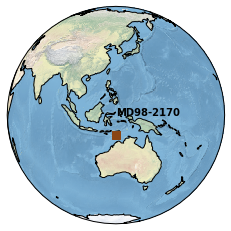

In [5]:
%matplotlib inline
fig = pyleo.mapLipd()

### <a name='mapnear'>mapNearRecords()</a>

Map all the records within a certain distance of a record

Synthax:
`fig = pyleoclim.mapNearRecords(timeseries = None, lipds = None, n = 5, radius = None, sameArchive = False, projection = 'Orthographic', proj_default = True, borders = False, rivers = False, lakes = False, background = True , markersize = 200, markersize_adjust = True, marker_r = "ko", marker_c = "default", cmap = "Reds", colorbar = True,   location = "right", label = "Distance in km", figsize = [4,4],ax = None, saveFig = False, dir = None, format = "eps")`

Optional arguments:
* `timeseries` (dict): A timeseries object. If none given, will prompt for one lipds (list): A list of LiPD files. (Optional)
* `n` (int): the number of records to match
* `radius` (float): The distance (in km) to search for nearby records.Default is to search the entire globe
* `sameArchive~ (bool): Returns only records with the same archiveType.Default is not to do so.
* `projection` (string): the map projection. Available projections:
            'Robinson', 'PlateCarree', 'AlbertsEqualArea',
            'AzimuthalEquidistant','EquidistantConic','LambertConformal',
            'LambertCylindrical','Mercator','Miller','Mollweide','Orthographic' (Default),
            'Sinusoidal','Stereographic','TransverseMercator','UTM',
            'InterruptedGoodeHomolosine','RotatedPole','OSGB','EuroPP',
            'Geostationary','NearsidePerspective','EckertI','EckertII',
            'EckertIII','EckertIV','EckertV','EckertVI','EqualEarth','Gnomonic',
            'LambertAzimuthalEqualArea','NorthPolarStereo','OSNI','SouthPolarStereo'
* `proj_default` (bool): If True, uses the standard projection attributes, including centering. Enter new attributes in a dictionary to change them. Lists of attributes can be found in the Cartopy documentation: https://scitools.org.uk/cartopy/docs/latest/crs/projections.html#eckertiv
* `background` (bool): If True, uses a shaded relief background (only one available in Cartopy)
* `borders` (bool): Draws the countries border. Defaults is off (False). 
* `rivers` (bool): Draws major rivers. Default is off (False).
* `lakes` (bool): Draws major lakes. Default is off (False).
* `markersize` (int): the size of the marker
* `markersize_adjust` (bool): If True, will proportionaly adjust the size of the marker according to distance.
* `marker_r`(list or str): The color and shape of the marker for the reference record.
* `marker_c` (list or str): The color and shape of the marker for the other records. Default is to use the color palette by archiveType. If set to None then the color of the marker will represent the distance from the reference records.
* `cmap` (str): The colormap to use to represent the distance from the reference record if no marker is selected.
* `colorbar` (bool): Create a colorbar. Default is True 
* `location` (str): Location of the colorbar
* `label` (str): Label for the colorbar.
* `figsize` (list): the size for the figure
* `ax`: Return as axis instead of figure (useful to integrate plot into a subplot)
* `saveFig` (bool): default is to not save the figure
* `dir` (str): the full path of the directory in which to save the figure. If not provided, creates a default folder called 'figures' in the LiPD working directory (lipd.path).
* `format` (str): One of the file extensions supported by the active backend. Default is "eps". Most backend support png, pdf, ps, eps, and svg.

Returns: the figure

0 :  Arc-Yukon.D'Arrigo.2006 :  trsgi
1 :  Arc-Yukon.D'Arrigo.2006 :  year
2 :  Eur-NorthernSpain.Martín-Chivelet.2011 :  d18O
3 :  Eur-NorthernSpain.Martín-Chivelet.2011 :  year
4 :  Arc-LakeNataujärvi.Ojala.2005 :  X_radiograph_dark_layer
5 :  Arc-LakeNataujärvi.Ojala.2005 :  year
6 :  MD982176.Stott.2004 :  depth
7 :  MD982176.Stott.2004 :  yrbp
8 :  MD982176.Stott.2004 :  d18og.rub
9 :  MD982176.Stott.2004 :  d18ow-s
10 :  MD982176.Stott.2004 :  mg/ca-g.rub
11 :  MD982176.Stott.2004 :  sst
12 :  Juxtlahuaca.Lachniet.2012 :  distance_from_top
13 :  Juxtlahuaca.Lachniet.2012 :  d18o_measurement
14 :  Juxtlahuaca.Lachniet.2012 :  d18o_precision
15 :  Juxtlahuaca.Lachniet.2012 :  age
16 :  Ocn-MadangLagoonPapuaNewGuinea.Kuhnert.2001 :  d18O
17 :  Ocn-MadangLagoonPapuaNewGuinea.Kuhnert.2001 :  year
18 :  Asi-Dasuopu.Thompson.2000 :  d18O
19 :  Asi-Dasuopu.Thompson.2000 :  year
20 :  Asi-Dasuopu.Thompson.2000 :  dust
21 :  Asi-Dasuopu.Thompson.2000 :  chloride
22 :  Asi-Dasuopu.Thompson.

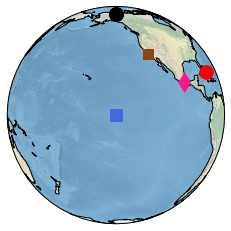

In [6]:
%matplotlib inline
fig = pyleo.mapNearRecords()

## <a id="plots">Plotting</a>

### <a name='plotTs'>plotTs()</a>

Plot a time series. 

Synthax:
`fig = pyleoclim.plotTs(timeseries = None, x_axis = None, markersize = 50, marker = "default", figsize = [10,4], saveFig = False, dir = "figures", format="eps")`

Optional arguments:
* `timeseries`: A timeseries object as defined in LiPD. If left blank, you'll be prompted to choose the record from a list.
* `x-axis`: The representation against which to plot the paleo-data. Options are "age","year", and "depth". Default is to let the system choose if only one available or prompt the user. 
* `markersize`: Default is 50
* `marker`: Shape and color. Default uses the Pyleoclim color palette. If you wish to change the default marker, enter the color and shape (**in this order**). For instance to use a red square, use `'rs'`.
* `figsize`: The size of the figure
*  `saveFig`: if `True`, saves the plot into the `dir` folder in the current working directory. 
* `dir`: a folder in the current directory, where the various figures can be saved. If left blank, a folder named `figures` will be automatically created
* `format`: One of the file extensions supported by the ative backend. Default is `eps`. Most backends support `png`, `pdf`, `ps`, and `svg`. 

Returns: the figure

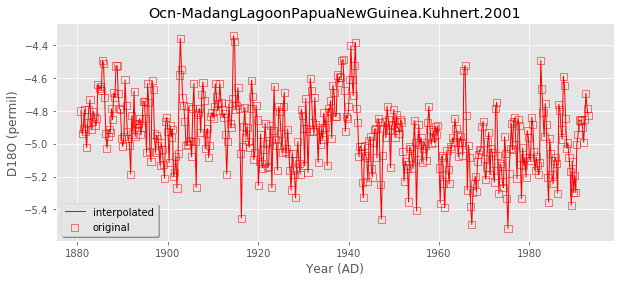

In [8]:
%matplotlib inline
fig = pyleo.plotTs(timeseries = ts_list[16], marker = 'rs')

### <a name='plotens'>plotEnsTs()</a>

Plot an ensemble time series

Synthax:
`fig = plotEnsTs(timeseries = None, lipd =None, ensTableName = None, ens = None, color = "default", alpha = 0.005, figsize = [10,4], saveFig = False, dir = "", format="eps"):`
              
Arguments:
* `timeseries`: LiPD timeseries object. By default, will prompt for one
* `lipd`: The LiPD dictionary. MUST be provided if timeseries is set.
* `ensTableName`: The name of the ensemble table, if known.
* `ens`: Number of ensembles to plot. By default, will plot either the number of ensembles stored in the chronensembleTable or 500 of them, whichever is lower
* `color`: The line color. If None, uses the default color palette
* `alpha`: Transparency setting for each line. Default is 0.005.
* `figsize`: the size for the figure
* `saveFig`: If True, saves the figure
* `dir`: a folder in the current directory, where the various figures can be saved. If left blank, a folder named `figures` will be automatically created
* `format`: One of the file extensions supported by the ative backend. Default is `eps`. Most backends support `png`, `pdf`, `ps`, and `svg`.

Returns: the figure

Plotting 500 ensemble members


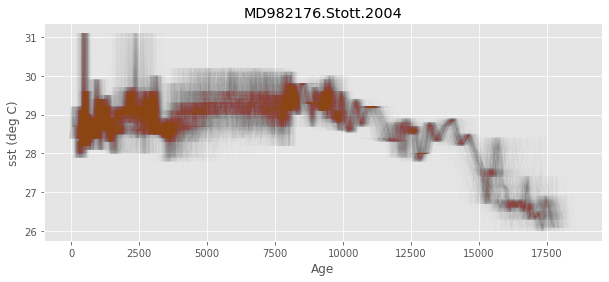

In [12]:
%matplotlib inline
fig = pyleo.plotEnsTs(timeseries=ts_list[11], lipd = lipds['MD982176.Stott.2004'])

### <a name='histTs'>histTs()</a>

Plot a histogram of a timeseries.

Synthax:
`fig = pyleoclim.histTs(timeseries = None, bins = None, hist = True, kde = True, rug = False, fit = None, hist_kws = {"label":"Histogram"}, kde_kws = {"label":"KDE fit"}, rug_kws = {"label":"Rug"}, fit_kws = {"label":"Fit"}, color = "default", vertical = False, norm_hist = True,  figsize = [5,5], saveFig = False, format ="eps", dir = "")`

Optional arguments:
* `timeseries`: A timeseries object as defined in LiPD. If left blank, you'll be prompted to choose the record from a list.
* `bins`: Specification of hist bins following matplotlib(hist), or None to use Freedman-Diaconis rule
* `hist`: Whether to plot a (normed) histogram    
* `kde`: Whether to plot a gaussian kernel density estimate
* `rug`: Whether to draw a rugplot on the support axis
* `fit`: Random variable object. An object with fit method, returning a tuple that can be passed to a pdf method of positional arguments following a grid of values to evaluate the pdf on.
* `{hist, kde, rug, fit}_kws`: Dictionaries. Keyword arguments for underlying plotting functions. If modifying the dictionary, make sure the labels "hist", "kde", "rug" and "fit" are still passed.
* `color`: matplotlib color. Color to plot everything but the fitted curve in.
* `vertical`: if True, oberved values are on y-axis.
* `norm_hist`: If True (default), the histrogram height shows a density rather than a count. This is implied if a KDE or fitted density is plotted
* `figsize`: The size of the figure
* `saveFig`: If True, saves the figure
* `dir`: a folder in the current directory, where the various figures can be saved. If left blank, a folder named `figures` will be automatically created
* `format`: One of the file extensions supported by the ative backend. Default is `eps`. Most backends support `png`, `pdf`, `ps`, and `svg`. 

Returns: The figure

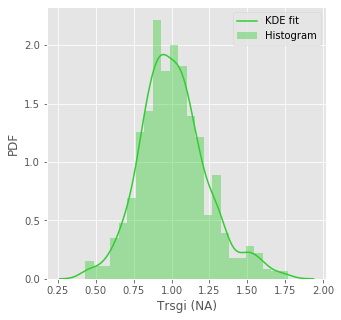

In [13]:
%matplotlib inline
fig = pyleo.histTs(timeseries=ts_list[0])

### <a name='sumplots'>Summary Plots</a>
Summary Plots are special plots in Pyleoclim that allow to get basic information about a record.

<div class="alert alert-warning" role="alert" style="margin: 10px">
<p>**NOTE**</p>
<p> These functions use the default color palette and are not customizable.</p> 
</div> 

#### <a name='basicsum'>summaryTs()</a>

This functions plots:
1. The time series
2. A histogram of the paleoData values
3. The location map
4. Spectral analysis if time information is available in the paleoDataTable
5. Metadata information

Synthax: `fig = pyleoclim.SummaryTs(timeseries = None, x_axis=None, saveFig = False, format = "eps", dir = "figures")`

* `timeseries`: A timeseries object as defined in LiPD. If left blank, you'll be prompted to choose the record from a list.
* `x-axis`: The representation against which to plot the paleo-data. Options are "age","year", and "depth". Default is to let the system choose if only one available or prompt the user.  
*  `saveFig`: if `True`, saves the map into the `dir` folder in the current working directory. 
* `dir`: a folder in the current directory, where the various figures can be saved. If left blank, a folder named `figures` will be automatically created
* `format`: One of the file extensions supported by the ative backend. Default is `eps`. Most backends support `png`, `pdf`, `ps`, and `svg`. 

Returns: The figure

Do you want to use time or depth?
Enter 0 for time and 1 for depth: 0


Monte-Carlo simulations: 100%|██████████| 200/200 [00:00<00:00, 305.14it/s]
//anaconda3/envs/py36P/lib/python3.6/site-packages/pyleoclim/__init__.py:1175: RuntimeWarning: divide by zero encountered in true_divide
  ax4.plot(1/freqs, psd, linewidth=1,  label='PSD', color = marker[0])
//anaconda3/envs/py36P/lib/python3.6/site-packages/pyleoclim/__init__.py:1176: RuntimeWarning: divide by zero encountered in true_divide
  ax4.plot(1/freqs, psd_ar1_q95, linewidth=1,  label='AR1 95%', color=sns.xkcd_rgb["pale red"])


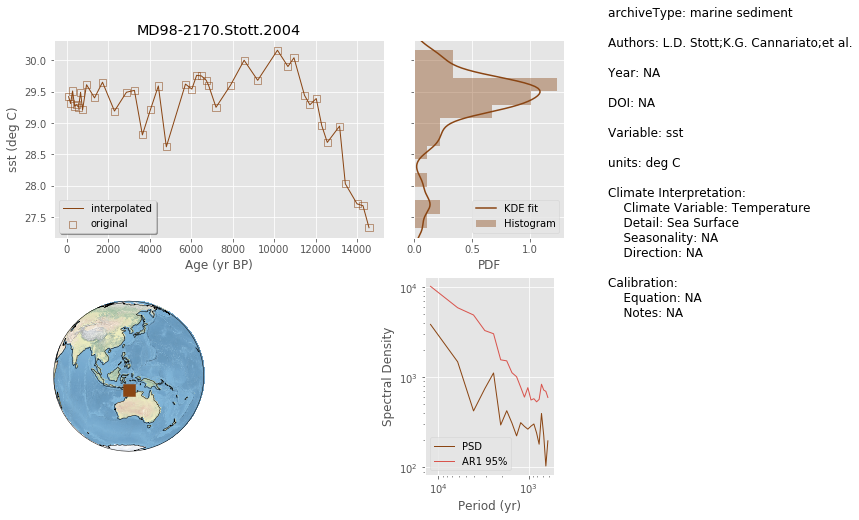

In [15]:
%matplotlib inline
fig = pyleo.summaryTs(timeseries = ts_list[38])

## <a id="basic"> Statistics </a>

### <a name='stats'>statsTs()</a>

Returns the mean, median, min, max, standard deviation and interquartile range of the timeseries.

synthax: `mean, median, min, max, std, IQR = pyleoclim.statsTs(timeseries=None)`

Optional arguments:
* `timeseries`: If blank, will prompt for one.

In [16]:
mean, median, min_v, max_v, std, IQR = pyleo.statsTs(timeseries=ts_list[49])
print(mean)
print(median)
print(min_v)
print(max_v)
print(std)
print(IQR)

10.430049504950494
10.443
10.05
10.884
0.15890282080614854
0.19799999999999862


### <a name='corrsig'> corrSigTs </a>

Estimates the significance of correlations between two timeseries

synthax: `r, sig, p = pyleoclim.corrSigTs(timeseries1 = None, timeseries2 = None, x_axis = None, autocorrect = True,
autocorrect_param = 1950, interp_method = 'interpolation', 'intepr_step = None, start = None, end = None, nsim = 1000, method = 'isospectral', alpha = 0.05))`

Optional arguments:
* `timeseries1, timeseries2`: timeseries object. Default is blank.
* `x-axis (str)`: The representation against which to express thempaleo-data. Options are "age", "year", and "depth". Default is to let the system choose if only one available or prompt the user.
* `interp_method (str)`: If the timeseries are not on the same axis, which interpolation method to use. Valid entries are 'interpolation' (default) and 'bin'
* `autocorrect (bool)`: If applicable, convert age to year automatically. If set to False, timeseries objects should have converted time axis and updated units label in the dictionary
* `autocorrect_param (float)`: Reference for age/year conversion.
* `interp_step (float)`: the step size. By default, will prompt the user.
* `start (float)`: Start time/age/depth. Default is the maximum of the minima of the two timeseries
* `end (float)`: End time/age/depth. Default is the minimum of themaxima of the two timeseries
* `nsim (int)`: the number of simulations. Default is 1000
* `method (str)`: method use to estimate the correlation and significance.
   Available methods include:
   - 'ttest': T-test where the degrees of freedom are corrected for the effect of serial correlation
   - 'isopersistant': AR(1) modeling of the two timeseries
   - 'isospectral' (default): phase randomization of original inputs.
   The T-test is parametric test, hence cheap but usually wrong except in idyllic circumstances.
   The others are non-parametric, but their computational requirements scales with nsim.
* `alpha (float)`: significance level for critical value estimation. Default is 0.05

Returns:
* `r (float)`: correlation between the two timeseries
* `sig (bool)`: Returns Trus if significant, False otherwise
* `p (real)`: significance level for critical value estimation

In [4]:
r,sig,p = pyleo.corrSigTs(timeseries1=ts_list[11],timeseries2=ts_list[38])
print(r)
print(sig)
print(p)

100%|██████████| 1000/1000 [00:00<00:00, 34025.07it/s]

The two series don't have the same length. Interpolating ...
0.7261207148328227
True
0.001


## <a id="timeseries"> Timeseries manipulation </a>

### <a name='bin'> binTs() </a>

Bins the values of the timeseries 

synthax: `bins, binned_values, n, error = pyleoclim.binTs(timeseries=None, x_axis =None, bin_size = None, start = None, end = None)`

Optional arguments:
* `Timeseries`. Default is blank, will prompt for it
* `x-axis`: the time or depth index to use for binning. Valid keys inlude: depth, age, and year. 
* `bin_size`: the size of the bins to be used. If not given, the function will prompt the user
* `start`: where the bins should start. Default is the minimum 
* `end`: where the bins should end. Default is the maximum

Returns:
* `bins`: the bins centered on the median (i.e., the 100-200 yr bin is 150 yr)
* `binned_values`: the mean of the paleoData values in the particular bin
* `n`: the number of values used to obtain the average
* `error`: the standard error of the mean

Do you want to use time or depth?
Enter 0 for time and 1 for depth: 0


Text(0.5, 1.0, 'MD982176.Stott.2004')

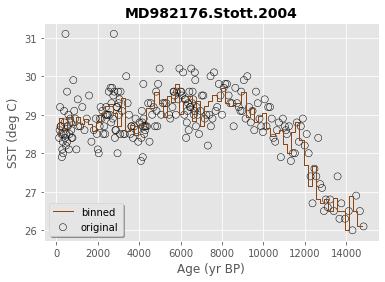

In [8]:
"""
Note the following provides an example on how to use pyleoclim in conjunction with making your own plots.
This example is mean to work with the following timeseries: MD982176.Stott.2004 :  sst
"""
ts = ts_list[11]
# Bin the data
bin_size = 200
bins, binned_data, n, error  = pyleo.binTs(timeseries = ts, bin_size = bin_size)

# Get the archiveType
archiveType = pyleo.LipdUtils.LipdToOntology(ts["archiveType"])

# Make a figure of the binned vs original data 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
marker = [pyleo.plot_default[archiveType][0], pyleo.plot_default[archiveType][1]] #define color coding
markersize = 50 #define marker size
plt.scatter(ts["age"], ts["paleoData_values"],
           s = markersize,
           facecolor = 'none',
           edgecolor = 'k',
           marker = 'o',
           label = 'original')
plt.step(bins-bin_size/2,binned_data,
        where = 'pre',
        color = marker[0],
        linewidth = 1.0,
        label = 'binned')
plt.xlabel("Age (yr BP)")
plt.ylabel("SST (deg C)")
plt.legend(loc = 3, scatterpoints =1, fancybox = True, shadow = True, fontsize = 10)
plt.title(ts["dataSetName"], fontsize = 14, fontweight = "bold")

### <a name='interp'>interpTs()</a>

Bins the values of the timeseries 

synthax: `interp_age, interp_values = pyleoclim.interpTs(timeseries=None, x_axis = None, interp_step = None, start = None, end = None)`

Optional arguments:
* `Timeseries`. Default is blank, will prompt for it
* `x-axis`: the time or depth index to use for binning. Valid keys inlude: depth, age, and year. 
* `interp_step`: the step size. If not given, the function will prompt the user
* `start`: where the bins should start. Default is the minimum 
* `end`: where the bins should end. Default is the maximum

Returns:
* `interp_age`: the interpolated age according to the end/start and time step
* `interp_values`: the interpolated values

Do you want to use time or depth?
Enter 0 for time and 1 for depth: 0


Text(0.5, 1.0, 'MD982176.Stott.2004')

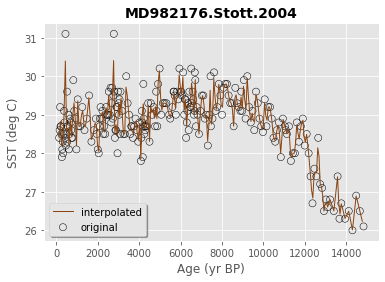

In [10]:
"""
Note the following provides an example on how to use pyleoclim in conjunction with making your own plots.
This example is mean to work with the following timeseries: MD982176.Stott.2004 :  sst
"""

# get a new timeseries object
new_timeseries = ts_list[11]

# interpolate the data
interp_age, interp_values = pyleo.interpTs(timeseries = new_timeseries)

# Get the archiveType
archiveType = pyleo.LipdUtils.LipdToOntology(new_timeseries["archiveType"])

# Make a figure of the binned vs original data 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
marker = [pyleo.plot_default[archiveType][0], pyleo.plot_default[archiveType][1]] #define color coding
markersize = 50 #define marker size
plt.scatter(new_timeseries["age"], new_timeseries["paleoData_values"],
           s = markersize,
           facecolor = 'none',
           edgecolor = 'k',
           marker = 'o',
           label = 'original')
plt.plot(interp_age,interp_values,
        color = marker[0],
        linewidth = 1.0,
        label = 'interpolated')
plt.xlabel("Age (yr BP)")
plt.ylabel("SST (deg C)")
plt.legend(loc = 3, scatterpoints =1, fancybox = True, shadow = True, fontsize = 10)
plt.title(new_timeseries["dataSetName"], fontsize = 14, fontweight = "bold")

### <a name='std'>standardizeTs()</a>

Centers and normalizes the paleoData values of a  given time series.

synthax: `z, mu, sig = pyleoclim.standardizeTs(timeseries = None, scale = 1, ddof = 0, eps = 1e-3)`

Arguments:
* `timeseries (array)`: A LiPD timeseries object
* `scale (real)`: a scale factor used to scale a record to a match a given variance
* `ddof (int)`: degress of freedom correction in the calculation of the standard deviation
* `eps (real)`: a threshold to determine if the standard deviation is too close to zero

Returns:
* `z (array)`: the standardized time series (z-score), Z = (X - E[X])/std(X)*scale, NaNs allowed \n
* `mu (real)`: the mean of the original time series, E[X] \n
* `sig (real)`: the standard deviation of the original time series, std[X] \n

In [12]:
import numpy as np

z, mu, sig = pyleo.standardizeTs(timeseries = ts_list[11])
print ('Original timeseries mean: '+str(mu))
print ('Original timeseries std: '+str(sig))
print ('Standardized timeseries mean: '+str(np.nanmean(z)))
print ('Standardized timeseries mean: '+str(np.nanstd(z)))

Original timeseries mean: 28.801821862348177
Original timeseries std: 0.8184899697706474
Standardized timeseries mean: 1.1650599513475326e-15
Standardized timeseries mean: 1.0


### <a name='segment'>segmentTs()</a>

Divides a time series into several segments using a gap detection algorithm.

Gap detection rule: If the time interval between some two data points is
    larger than some factor times the mean resolution of the timeseries, then
    a brak point is applied and the timseries is divided.

synthax: `seg_y, seg_t, n_segs = pyleoclim.segmentTs(timeseries=None, factor = 2)`

Optional arguments:
* `Timeseries`. Default is blank, will prompt for it
* `factor`: factor to adjust the threshold. threshold = factor*dt_mean. Default is 2. 

Returns:
* `seg_y`: a list of several segments with potentially different length
* `seg_t`: A list of the time values for each y segment. 
* `n_segs`: the number of segments

In [16]:
seg_y, seg_t, n_segs = pyleo.segmentTs(timeseries = ts_list[47], factor = 2)
print('The number of segments is '+ str(n_segs))

The number of segments is 1


## <a id="spectral"> Analysis in the frequency domain </a>

### <a name='wwz'>wwzTs()</a>

Weigthed wavelet Z-transform analysis

Wavelet analysis for unevenly spaced data adapted from Foster et al. (1996)

synthax: `dict_out, fig = pyleoclim.wwzTs(timeseries = None, lim = None, wwz = False, psd = True, wwz_default = True,
          psd_default = True, wwaplot_default = True, psdplot_default = True,
          fig = True, saveFig = False, dir = None, format = "eps")`

Arguments:
* `timeseries (dict)`: A LiPD timeseries object (Optional, will prompt for one.)
* `lim (list)`: Truncate the timeseries between min/max time (e.g., [0,10000])
* `wwz (bool)`: If True, will perform wavelet analysis
* `psd (bool)`: If True, will inform the power spectral density of the timeseries
* `wwz_default`: If True, will use the following default parameters:
            
            wwz_default = {'tau':None,
                           'freqs':None,
                           'c':1/(8*np.pi**2),
                           'Neff':3,
                           'Neff_coi':3,
                           'nMC':200,
                           'nproc':8,
                           'detrend':'no',
                           'params' : ["default",4,0,1],
                           'gaussianize': False,
                           'standardize':True,
                           'method':'Kirchner_f2py',
                           'bc_mode':'reflect',
                           'reflect_type':'odd',
                           'len_bd':0}
                
            Modify the values for specific keys to change the default behavior.
                
* `psd_default`: If True, will use the following default parameters:
            
            psd_default = {'tau':None,
                       'freqs': None,
                       'c':1e-3,
                       'nproc':8,
                       'nMC':200,
                       'detrend':'no',
                       'params' : ["default",4,0,1],
                       'gaussianize': False,
                       'standardize':True,
                       'Neff':3,
                       'anti_alias':False,
                       'avgs':1,
                       'method':'Kirchner_f2py',
                       }
            
            Modify the values for specific keys to change the default behavior.
            
* `wwaplot_default`: If True, will use the following default parameters:
            
            wwaplot_default={'AR1_q':AR1_q,
                                 'coi':coi,
                                 'levels':None,
                                 'tick_range':None,
                                 'yticks':None,
                                 'yticks_label': None,
                                 'ylim':None,
                                 'xticks':None,
                                 'xlabels':None,
                                 'figsize':[20,8],
                                 'clr_map':'OrRd',
                                 'cbar_drawedges':False,
                                 'cone_alpha':0.5,
                                 'plot_signif':True,
                                 'signif_style':'contour',
                                 'plot_cone':True,
                                 'title':None,
                                 'ax':None,
                                 'xlabel': label.upper()[0]+label[1:]+'('+s+')',
                                 'ylabel': 'Period ('+ageunits+')',
                                 'cbar_orientation':'vertical',
                                 'cbar_pad':0.05,
                                 'cbar_frac':0.15,
                                 'cbar_labelsize':None}
            
            Modify the values for specific keys to change the default behavior.
* `psdplot_default`: If True, will use the following default parameters:
            
            psdplot_default={'lmstyle':'-',
                                 'linewidth':None,
                                 'color': sns.xkcd_rgb["denim blue"],                                 
                                 'period_ticks':None,
                                 'period_tickslabel':None,
                                 'psd_lim':None,
                                 'period_lim':None,
                                 'figsize':[20,8],
                                 'label':'PSD',
                                 'plot_ar1':True,
                                 'psd_ar1_q95':psd_ar1_q95,
                                 'title': None,
                                 'psd_ar1_color':sns.xkcd_rgb["pale red"],
                                 'ax':None,
                                 'vertical':False,
                                 'plot_gridlines':True,
                                 'period_label':'Period ('+ageunits+')',
                                 'psd_label':'Spectral Density',
                                 'zorder' : None}  
            Modify the values for specific keys to change the default behavior.
            
* `fig (bool)`: If True, plots the figure
* `saveFig (bool)`: default is to not save the figure
* `dir (str)`: the full path of the directory in which to save the figure. If not provided, creates a default folder called 'figures' in the LiPD working directory (lipd.path).
* `format (str)`: One of the file extensions supported by the active backend. Default is "eps". Most backend support png, pdf, ps, eps, and svg.

Returns:
* dict_out (dict): A dictionary of outputs.    
   * For wwz:
     * wwa (array): The weights wavelet amplitude 
     * AR1_q (array): AR1 simulations 
     * coi (array): cone of influence 
     * freqs (array): vector for frequencies 
     * tau (array): the evenly-spaced time points, namely the time shift for wavelet analysis. 
     * Neffs (array): The matrix of effective number of points in the time-scale coordinates.
     * coeff (array): The wavelet transform coefficients
        
     * For psd: 
       * psd (array): power spectral density 
       * freqs (array): vector of frequency 
       * psd_ar1_q95 (array): the 95% quantile of the psds of AR1 processes 
        
* fig: The figure

Monte-Carlo simulations: 100%|██████████| 200/200 [00:02<00:00, 82.72it/s]


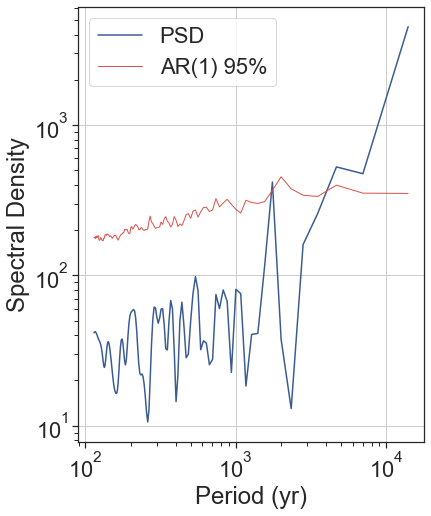

In [6]:
%matplotlib inline
dict_out, fig = pyleo.wwzTs(timeseries=ts_list[11])

Increase the number of Monte Carlo simulations to 1000 for the AR1 model and detrending

Monte-Carlo simulations: 100%|██████████| 1000/1000 [00:12<00:00, 80.36it/s]


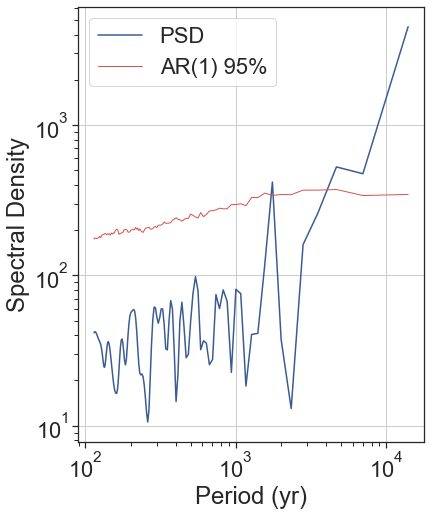

In [7]:
%matplotlib inline
dict_out, fig = pyleo.wwzTs(timeseries = ts_list[11], psd_default={'nMC':1000, 'detrend':'linear'})

Do the wavelet analysis

Monte-Carlo simulations: 100%|██████████| 200/200 [00:02<00:00, 78.16it/s]
//anaconda3/envs/py36P/lib/python3.6/site-packages/pyleoclim/Spectral.py:2072: RuntimeWarning: divide by zero encountered in true_divide
  plt.contourf(tau, 1/freqs, wwa.T, cmap=clr_map, origin=origin)
//anaconda3/envs/py36P/lib/python3.6/site-packages/pyleoclim/Spectral.py:2118: RuntimeWarning: divide by zero encountered in true_divide
  plt.contour(tau, 1/freqs, signif.T, [-99, 1], colors='k')


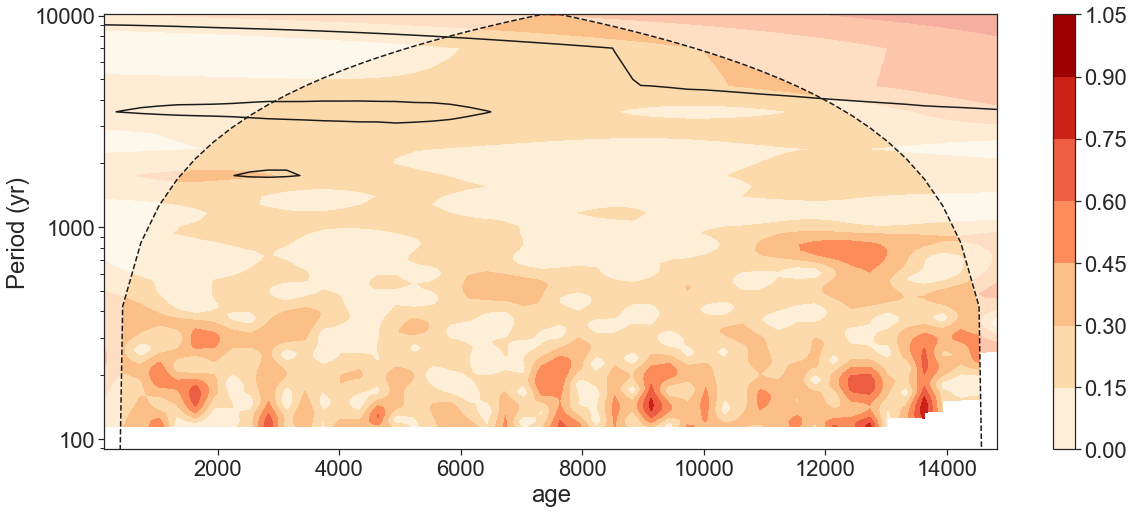

In [4]:
%matplotlib inline
dict_out, fig = pyleo.wwzTs(timeseries = ts_list[11], wwz = True, psd = False)

Now both

Monte-Carlo simulations: 100%|██████████| 200/200 [00:02<00:00, 88.11it/s]
//anaconda3/envs/py36P/lib/python3.6/site-packages/pyleoclim/Spectral.py:2342: RuntimeWarning: divide by zero encountered in true_divide
  x_data = 1 / freqs
//anaconda3/envs/py36P/lib/python3.6/site-packages/pyleoclim/Spectral.py:2344: RuntimeWarning: divide by zero encountered in true_divide
  x_data_ar1 = 1 / freqs


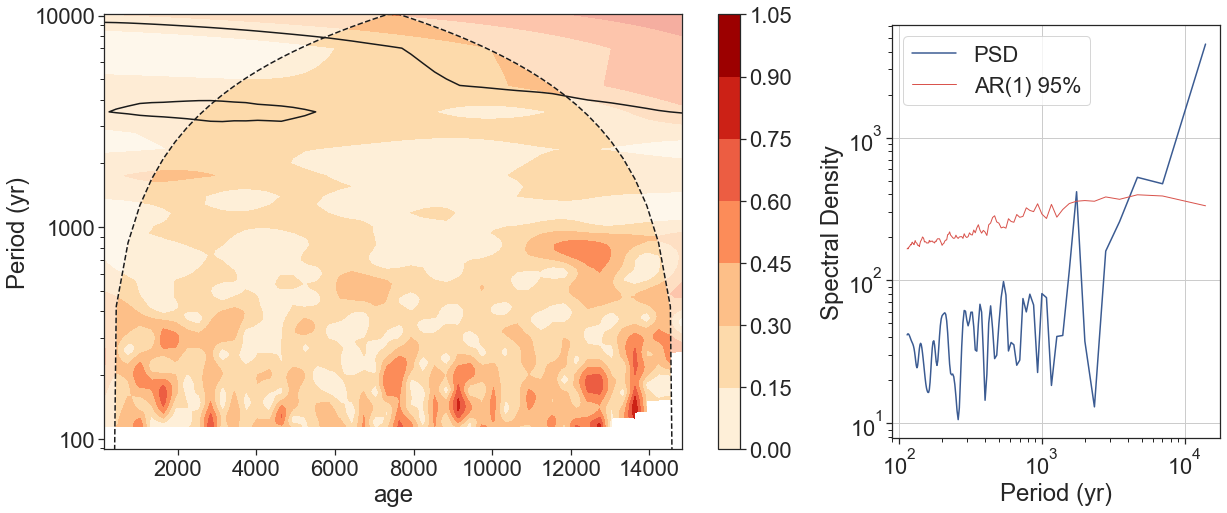

In [5]:
%matplotlib inline
dict_out, fig = pyleo.wwzTs(timeseries = ts_list[11], wwz = True)

## <a name='agemodel'> Age Modelling </a>

### <a name='bchron'> BChron </a>

<div class="alert alert-warning" role="alert" style="margin: 10px">
<p>**NOTE**</p>
<p> This functions makes use of the Bchron package written by Haslett and Parnell (2008) in R programming language. This function **requires** R to be installed.</p>
</div> 

<div class="alert alert-warning" role="alert" style="margin: 10px">
<p>**When using this function, please cite:**</p>
<p>Haslett, J., and Parnell, A. C. (2008). A simple monotone process with application to radiocarbon-dated depth chronologies. Journal of the Royal Statistical Society, Series C, 57, 399-418. DOI:10.1111/j.1467-9876.2008.00623.x</p>
<p> Parnell, A. C., Haslett, J., Allen, J. R. M., Buck, C. E., and Huntley, B. (2008). A flexible approach to assessing synchroneity of past events using Bayesian reconstructions of sedimentation history. Quaternary Science Reviews, 27(19-20), 1872-1885. DOI:10.1016/j.quascirev.2008.07.009
</div>

synthax: `depth, chron, positions, ageDist, fig  = pyleoclim.Bchron(lipd, modelNum = None, objectName = None, rejectAges = None, calCurves = None, reservoirAgeCorr = None, predictPositions = "paleo", positionsThickness = None, outlierProbs =None, iterations =1000, burn = 2000, thin = 8, extractDate = 1950-datetime.datetime.now().year, maxExtrap = 500, thetaMhSd = 0.5, muMhSd = 0.1, psiMhSd = 0.1, ageScaleVal = 1000, positionScaleVal = 100, saveLipd = True,plot = True, figsize = [4,8], flipCoor = False,xlabel = None, ylabel = None, xlim = None, ylim = None, violinColor = '#8B008B',medianLineColor = "black", medianLineWidth = 2.0, CIFillColor = "Silver", samplePaths = True, samplePathNumber =10, alpha = 0.5, saveFig = False, dir = "", format = "eps")`

Arguments:
* `lipd (dict)`: A dictionary containing the entry of a LiPD file. Can be obtained from lipd.readLipd() or pyleoclim.openLipd(). Please note that the Bchron function currently only allows for a single LiPD file (i.e., not the entire directory).
* `modelNum (int)`: The model number in which to place the Bchron output. If unknown, the function will try to make a guess and/or prompt based on the number of already available models. 
* `objectName (str)`: The name of the chron object in which to store the new model (e.g. "chron0")
* `rejectAges (vector)`: A vector of 1/0 where 1 include the dates to be rejected. Default it None.
* `calCurves (list)`: (Optional) A vector of values containing either 'intcal13', 'marine13', 'shcal13', or 'normal'. If none is provided, will prompt the user. Should be either of length =1 if using the same calibration for each age or the same length as the vector of ages.
* `reservoirAgeCorr (array)`: (Optional) A list (matrix) of two floats that correspond to the DeltaR and DeltaR uncertainty. If already added to the ages and ages standard deviation, then enter [0,0] to bypass the prompt. Will only be applied if CalCurves is set to 'marine13'. Otherwise, leave to none.
* `predictPositions (array)`: (Optional) a vector of positions (e.g. depths) at which predicted age values are required. Defaults to a sequence of length 100 from the top position to the bottom position.
* `positionsThickness (array)`: (Optional) Thickness values for each of the positions. The thickness values should be the full thickness value of the slice. By default set to zero.
* `outlierProbs (array)`: (Optional) A vector of prior outlier probabilities, one for each age. Defaults to 0.01
* `iterations (int)`: (Optional) The number of iterations to start the procedure. Default and minimum should be 10000.
* `burn (int)`: (Optional) The number of starting iterations to discard. Default is 200
* `thin (int)`: (Optional) The step size for every iteration to keep beyond the burnin. Default is 8.
* `extractDate (float)`: (Optional) The top age of the core. Used for extrapolation purposes so that no extrapolated ages go beyond the top age of the core. Defaults to the current year.
* `maxExtrap (int)`: (Optional) The maximum number of extrapolations to perform before giving up and setting the predicted ages to NA. Useful for when large amounts of extrapolation are required, i.e. some of the predictPositions are a long way from the dated positions. Defaults to 500.
* `thetaMhSd (float)`:  (Optional)  The Metropolis-Hastings standard deviation for the age parameters. Defaults to 0.5.
* `muMhSd (float)`: (Optional)  The Metropolis-Hastings standard deviation for the compound Poisson-Gamma Scale. Defaults to 0.1
* `psiMhSd (float)`: (Optional) The Metropolis-Hastings standard deviation for the Compound Poisson-Gamma Scale.
* `ageScaleVal (int)`: (Optional) A scale value for the ages. Bchronology works best when the ages are scaled to be approximately between 0 and 100. The default value is thus 1000 for ages given in years.
* `positionScaleVal (int)`:  (Optional) A scale value for the positions. Bchronology works best when the positions are scaled to be approximately between 0 and 100. The default value is thus 100 for positions given in cm.
* `saveLipd (bool)`: If True, saves the ensemble, distribution, and probability tables along with the parameters used to run the model in the LiPD file.
* `plot (bool)`: If True, makes a plot for the chronology
* `figsize (list)`: The figure size. Default is [4,8]
* `flipCoor (bool)`: If True, plots depth on the y-axis.
* ` xlabel (str)`: The label for the x-axis
* `ylabel (str)`: The label for the y-axis
* `xlim (list)`: Limits for the x-axis. Default corresponds to the min/max of the depth vector.
* `ylim (list)`: Limits for the y-axis. Default set by matplotlib violinColor (str): The color for the violins. Default is purple
* `medianLineColor (str)`: The color for the median line. Default is black.
* `medianLineWidth (float)`: The width for the median line
* `CIFillColor (str)`: Fill color in between the 95% confidence interval. Default is silver.
* `samplePaths (bool)`: If True, draws sample paths from the distribution. Use the same color as the violins. 
* `samplePathNumber (int)`: The number of sample paths to draw. Default is 10. Note: samplePaths need to be set to True. 
* `alpha (float)`: The violins' transparency. Number between 0 and 1
* `saveFig (bool)`: default is to not save the figure
* `dir (str)`: the full path of the directory in which to save the figure. If not provided, creates a default folder called 'figures' in the LiPD working directory (lipd.path).
* `format (str)`: One of the file extensions supported by the active backend. Default is "eps". Most backend support png, pdf, ps, eps, and svg.

Returns:
* `depth`: the predicted positions (either same as the user or the default) \n
* `chron`: a numpy array of possible chronologies in each column. The number of rows is the same as the length of depth
* `ageDist`: the distribution of ages around each dates.
* `fig`: the figure 

Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: MD982176.Stott.2004.lpd
7.61 MB :That's a big file! This may take a while to load...
Finished read: 1 record
There is 1 model(s) already available.
Do you want to create (c) another or override (o) one? c
Looking for age data...
Age data found.
Looking for a depth/position column...
No match found on exact search, running partial match
Depth information found.
Looking for age uncertainty...
Uncertainty data found.
Looking for calibration curves...
No match found.
Here are the available variables: 
0 :  mid-depth
1 :  ams number
2 :  age14c
3 :  age14cuncertainty
Please select the variable you'd like to use or enter to continue: 
Please select a calibration curve
If you want to use the same calibration curve for all data points, enter the name once.
If you need to use a different calibration curve, enter each one separated by a coma. The list needs to be the same length as the number of datapoints
Enter 

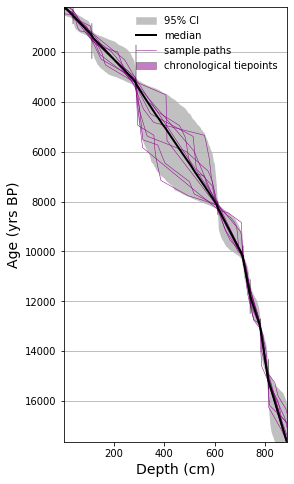

In [4]:
import pyleoclim as pyleo
import lipd as lpd

lipd = lpd.readLipd('./MD982176.Stott.2004.lpd')

%matplotlib inline
depth, chron, positions, ageDist, fig = pyleo.Bchron(lipd, saveLipd=False) 